In [1]:
import random
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from kmp import kmp_search, kmp_search_print, naive_search, str_find_search
%matplotlib inline

In [2]:
kmp_search_print("aab", "aacaaab")

- loop 1: i=0 j=0 p=[]aab t=[]aacaaab
  loop 1: p[j] == t[i] (a == a) => extend matched prefix

- loop 1: i=1 j=1 p=[a]ab t=[a]acaaab
  loop 1: p[j] == t[i] (a == a) => extend matched prefix

- loop 1: i=2 j=2 p=[aa]b t=[aa]caaab
    - loop 2: p[j] != t[i] (b != c) => try to extend smaller prefix
      loop 2: j = jump[2] = 1
      loop 2: i=2 j=1 p=[a]ab t=a[a]caaab
    - loop 2: p[j] != t[i] (a != c) => try to extend smaller prefix
      loop 2: j = jump[1] = 0
      loop 2: i=2 j=0 p=[]aab t=aa[]caaab
    - loop 2: p[j] != t[i] (a != c) => try to extend smaller prefix
      loop 2: j = jump[0] = -1
      loop 2: i=2 j=-1
  loop 1: cannot extend any prefix

- loop 1: i=3 j=0 p=[]aab t=aac[]aaab
  loop 1: p[j] == t[i] (a == a) => extend matched prefix

- loop 1: i=4 j=1 p=[a]ab t=aac[a]aab
  loop 1: p[j] == t[i] (a == a) => extend matched prefix

- loop 1: i=5 j=2 p=[aa]b t=aac[aa]ab
    - loop 2: p[j] != t[i] (b != a) => try to extend smaller prefix
      loop 2: j = jump[2] = 1
    

4

In [3]:
kmp_search_print("ababc", "abababc")

- loop 1: i=0 j=0 p=[]ababc t=[]abababc
  loop 1: p[j] == t[i] (a == a) => extend matched prefix

- loop 1: i=1 j=1 p=[a]babc t=[a]bababc
  loop 1: p[j] == t[i] (b == b) => extend matched prefix

- loop 1: i=2 j=2 p=[ab]abc t=[ab]ababc
  loop 1: p[j] == t[i] (a == a) => extend matched prefix

- loop 1: i=3 j=3 p=[aba]bc t=[aba]babc
  loop 1: p[j] == t[i] (b == b) => extend matched prefix

- loop 1: i=4 j=4 p=[abab]c t=[abab]abc
    - loop 2: p[j] != t[i] (c != a) => try to extend smaller prefix
      loop 2: j = jump[4] = 2
      loop 2: i=4 j=2 p=[ab]abc t=ab[ab]abc
  loop 1: p[j] == t[i] (a == a) => extend matched prefix

- loop 1: i=5 j=3 p=[aba]bc t=ab[aba]bc
  loop 1: p[j] == t[i] (b == b) => extend matched prefix

- loop 1: i=6 j=4 p=[abab]c t=ab[abab]c
  loop 1: p[j] == t[i] (c == c) => extend matched prefix
  loop 1: j == len(p) => return 2 = i + 1 - len(p)


2

In [4]:
def timeit(func, *args, **kwargs):
    tic= time.time()
    func(*args, **kwargs)
    toc = time.time()
    return toc - tic

In [5]:
def gen_test_data(length):
    return (
        "".join(random.choice("abc") for _ in range(length // 2)),
        "".join(random.choice("abc") for _ in range(length)),
    )

In [6]:
lengths = np.linspace(2, 500_000, 60, dtype=np.int64)
repeat = 3
test_data = {
    l: [gen_test_data(l) for _ in range(repeat)]
    for l in lengths    
}

In [7]:
def bench(func, test_data):
    x, y = [], []
    for l, data in test_data.items():
        for p, t in data:
            x.append(l)
            y.append(timeit(func, p, t))
    return np.array(x), np.array(y)

In [8]:
benchmarks = {
    "KMP": bench(kmp_search, test_data),
    "naive": bench(naive_search, test_data),
    "str.find": bench(str_find_search, test_data),
}

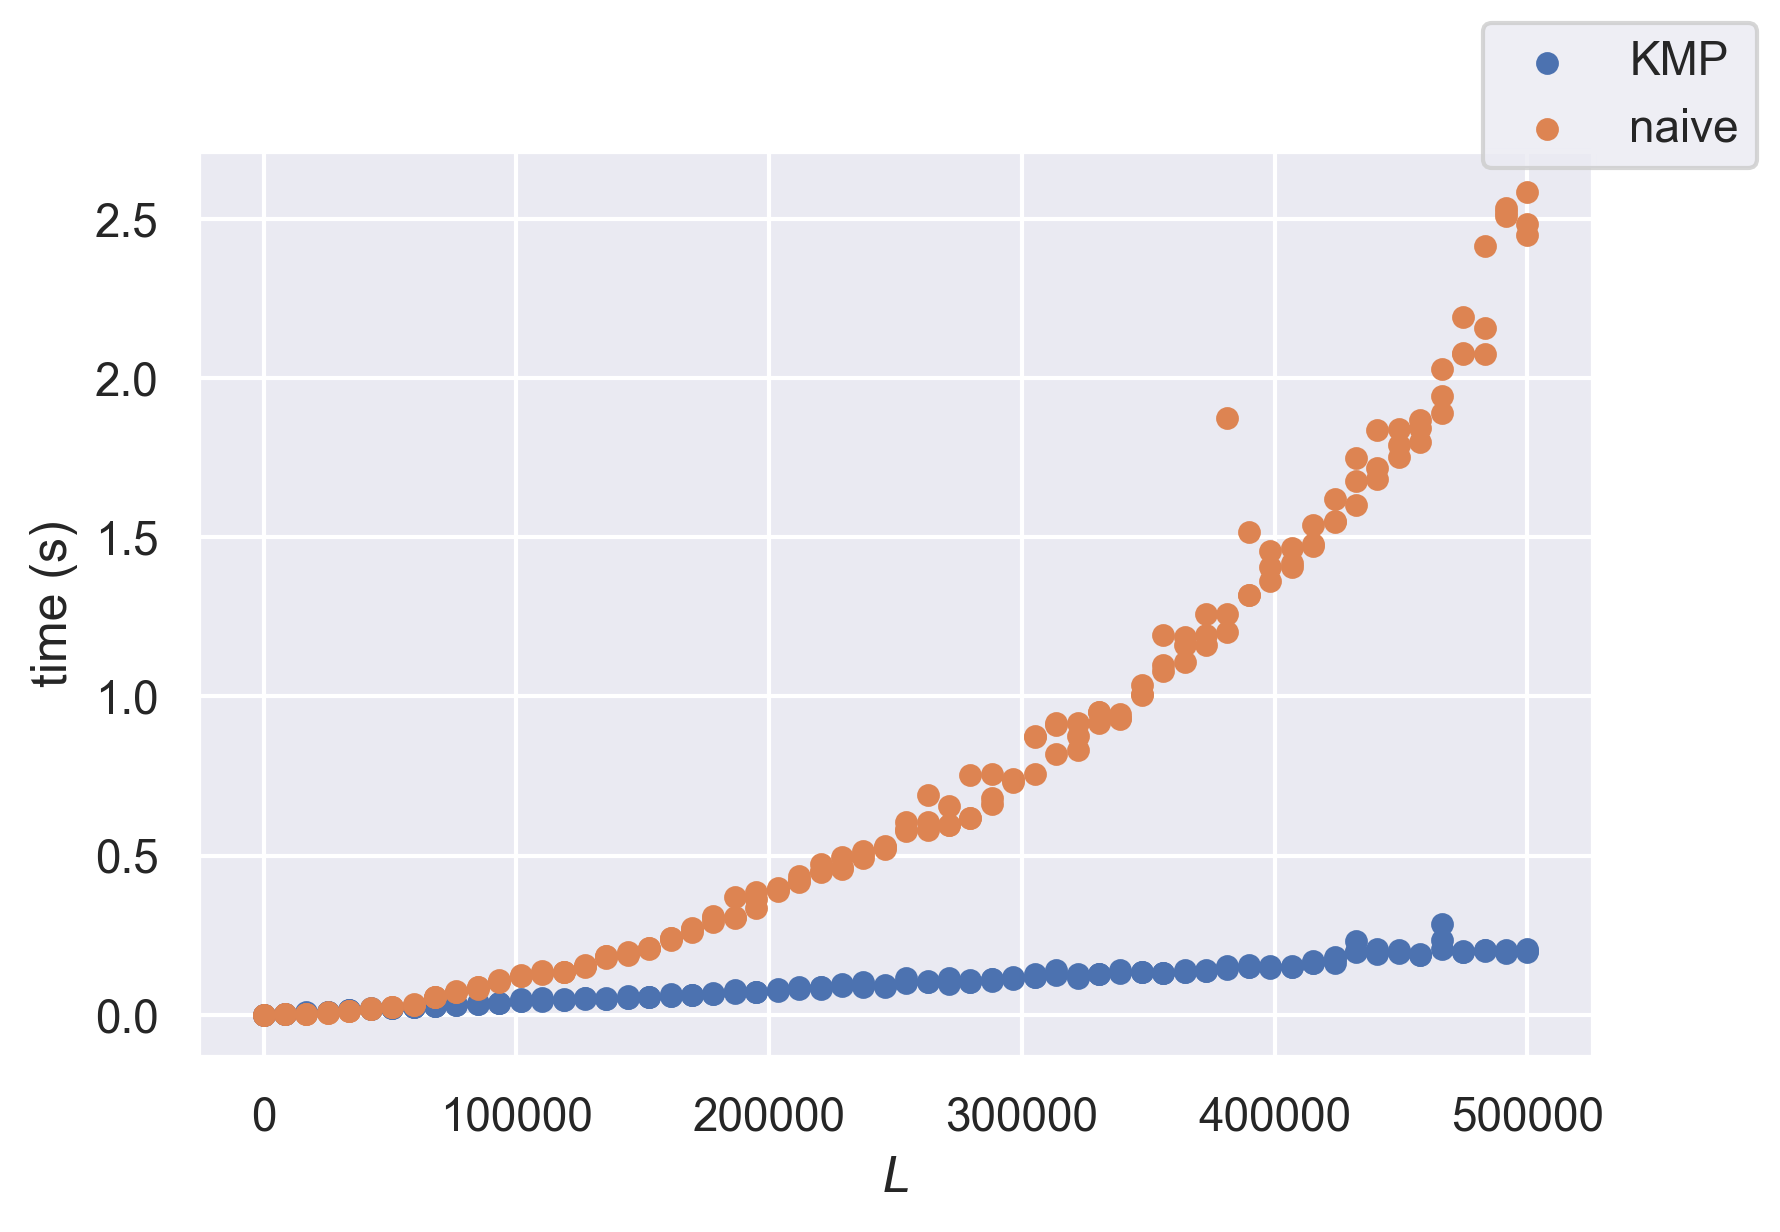

In [9]:
fig, ax = plt.subplots(subplot_kw={"xlabel": "$L$", "ylabel": "time (s)"}, dpi=300)
for label in ["KMP", "naive"]:
    (x, y) = benchmarks[label]
    ax.scatter(x, y, label=label, s=20)
fig.legend()

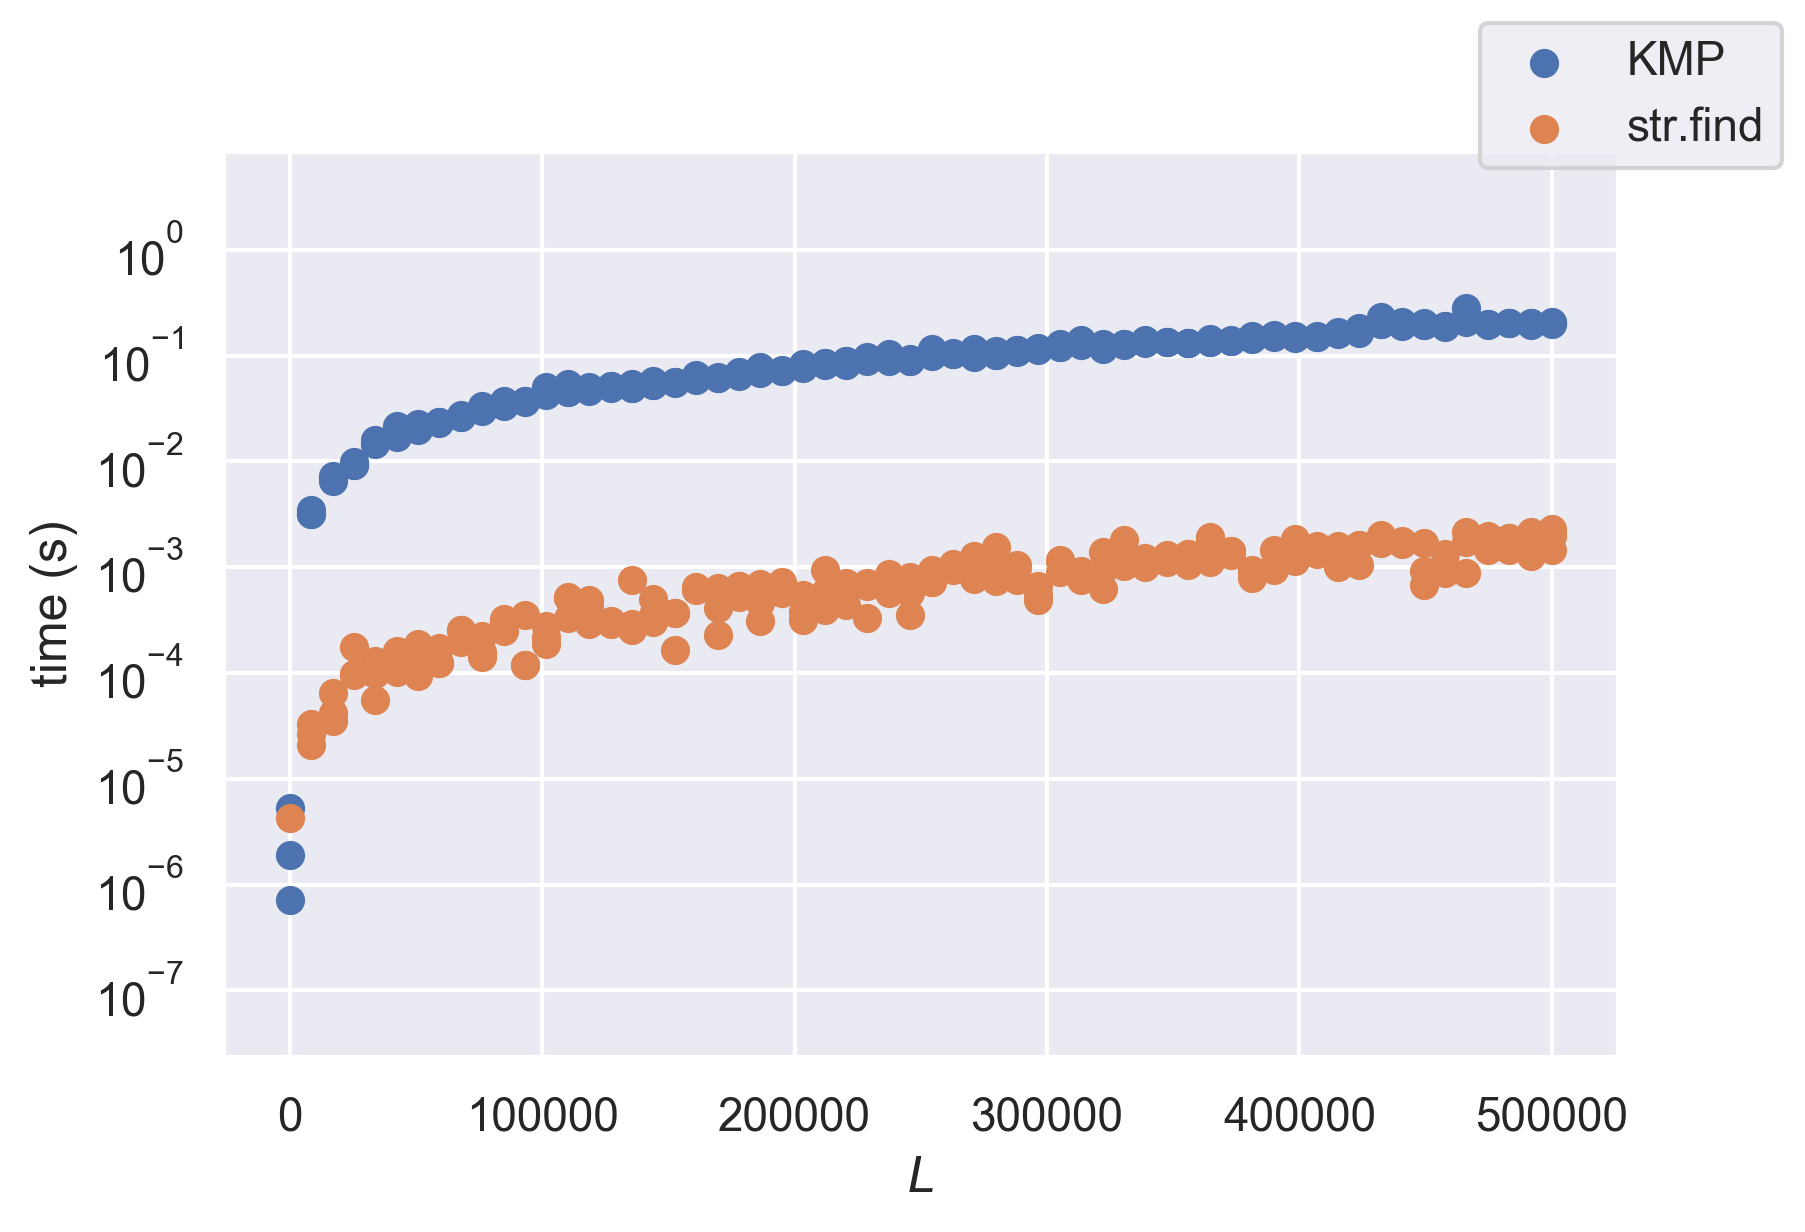

In [10]:
fig, ax = plt.subplots(subplot_kw={"xlabel": "$L$", "ylabel": "time (s)", "yscale": "log"}, dpi=300)
for label in ["KMP", "str.find"]:
    (x, y) = benchmarks[label]
    ax.scatter(x, y, label=label)
fig.legend()

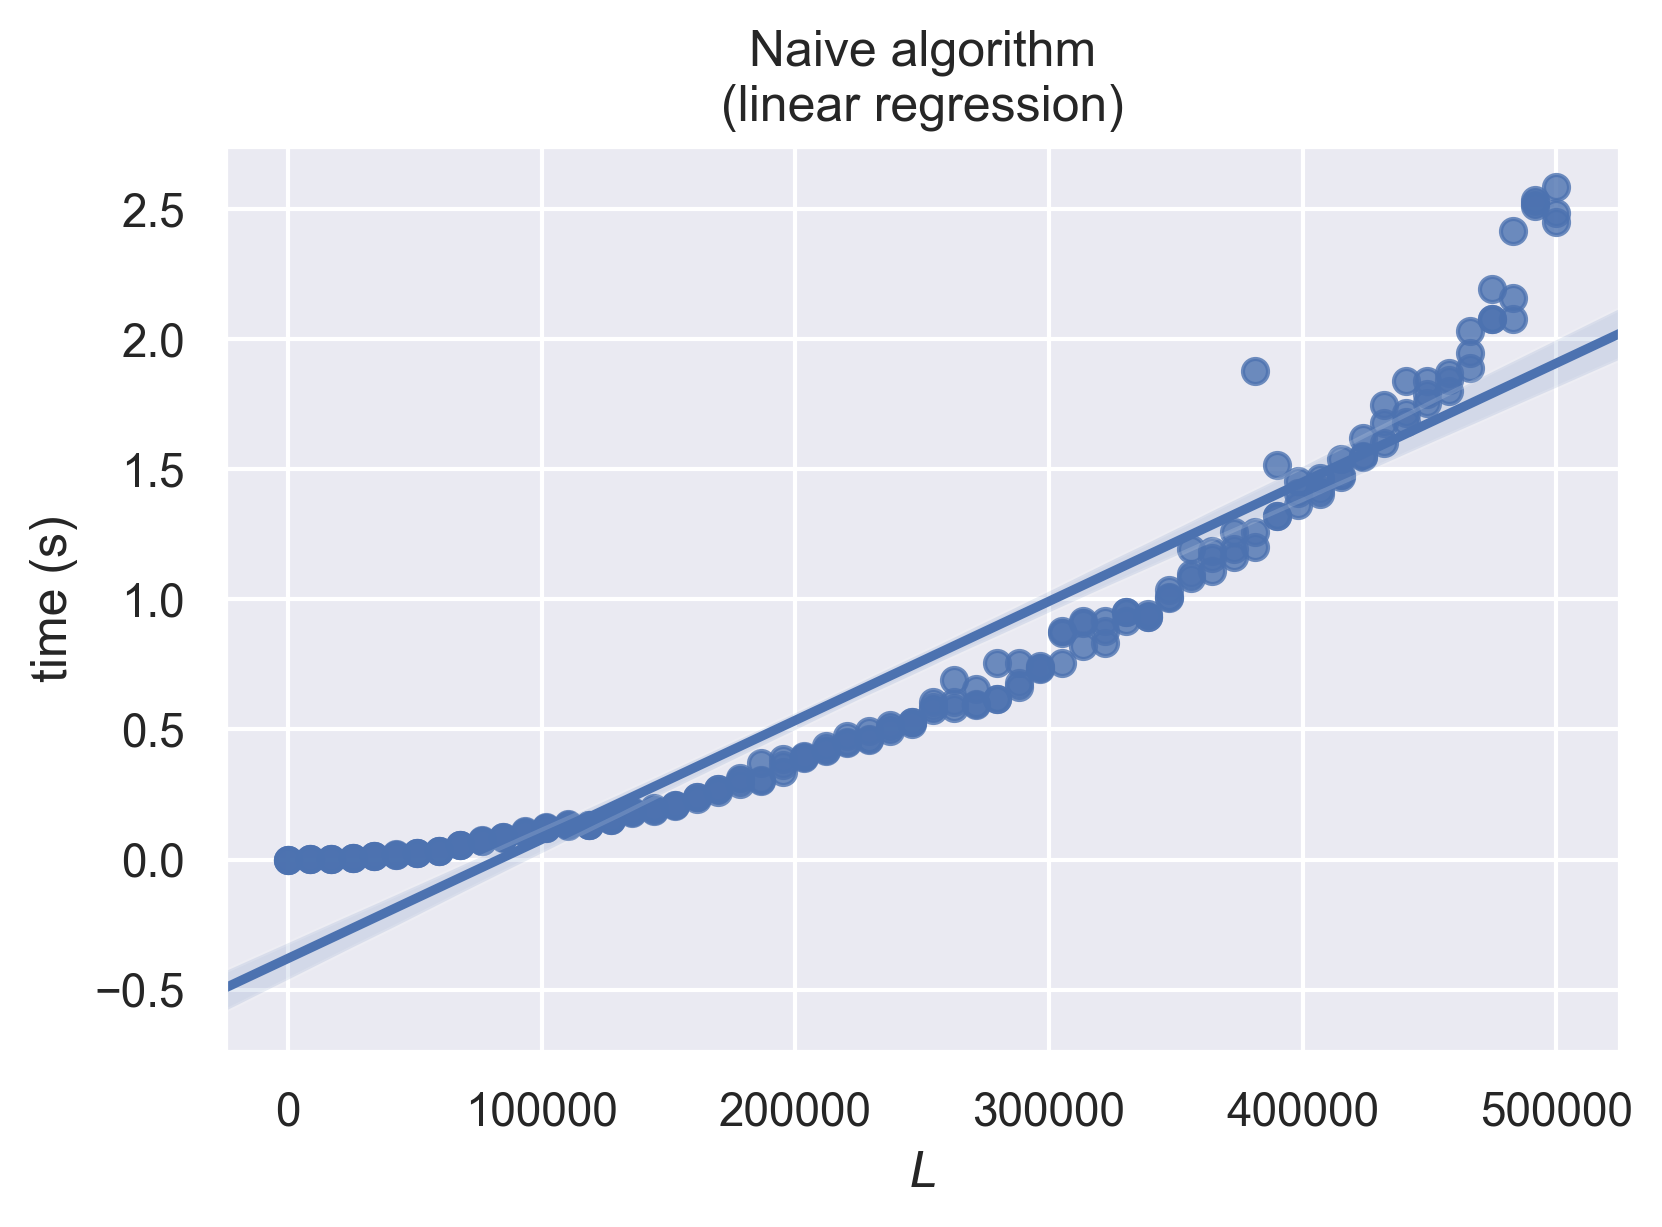

In [11]:
fig, ax = plt.subplots(subplot_kw={"xlabel": "$L$", "ylabel": "time (s)", "title": "Naive algorithm\n(linear regression)"}, dpi=300)
sns.regplot(*benchmarks["naive"], ax=ax);

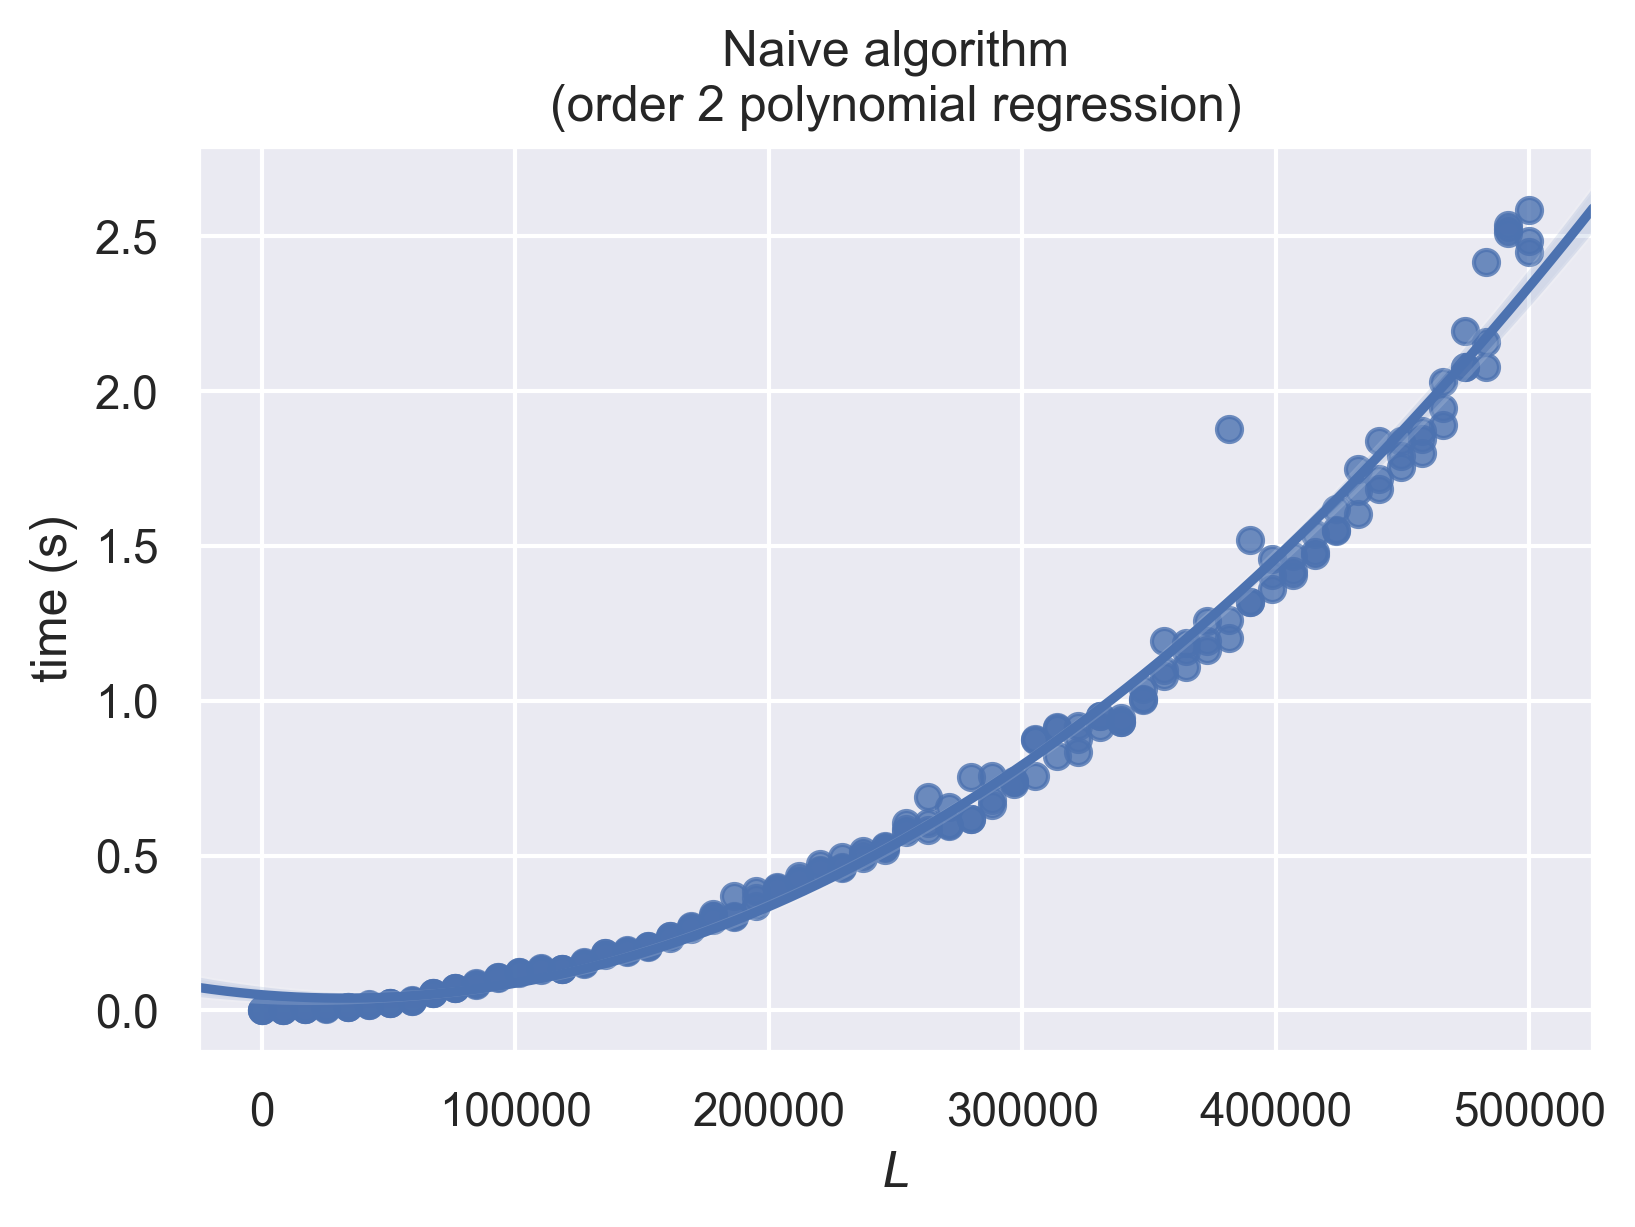

In [12]:
fig, ax = plt.subplots(subplot_kw={"xlabel": "$L$", "ylabel": "time (s)", "title": "Naive algorithm\n(order 2 polynomial regression)"}, dpi=300)
sns.regplot(*benchmarks["naive"], ax=ax, order=2);

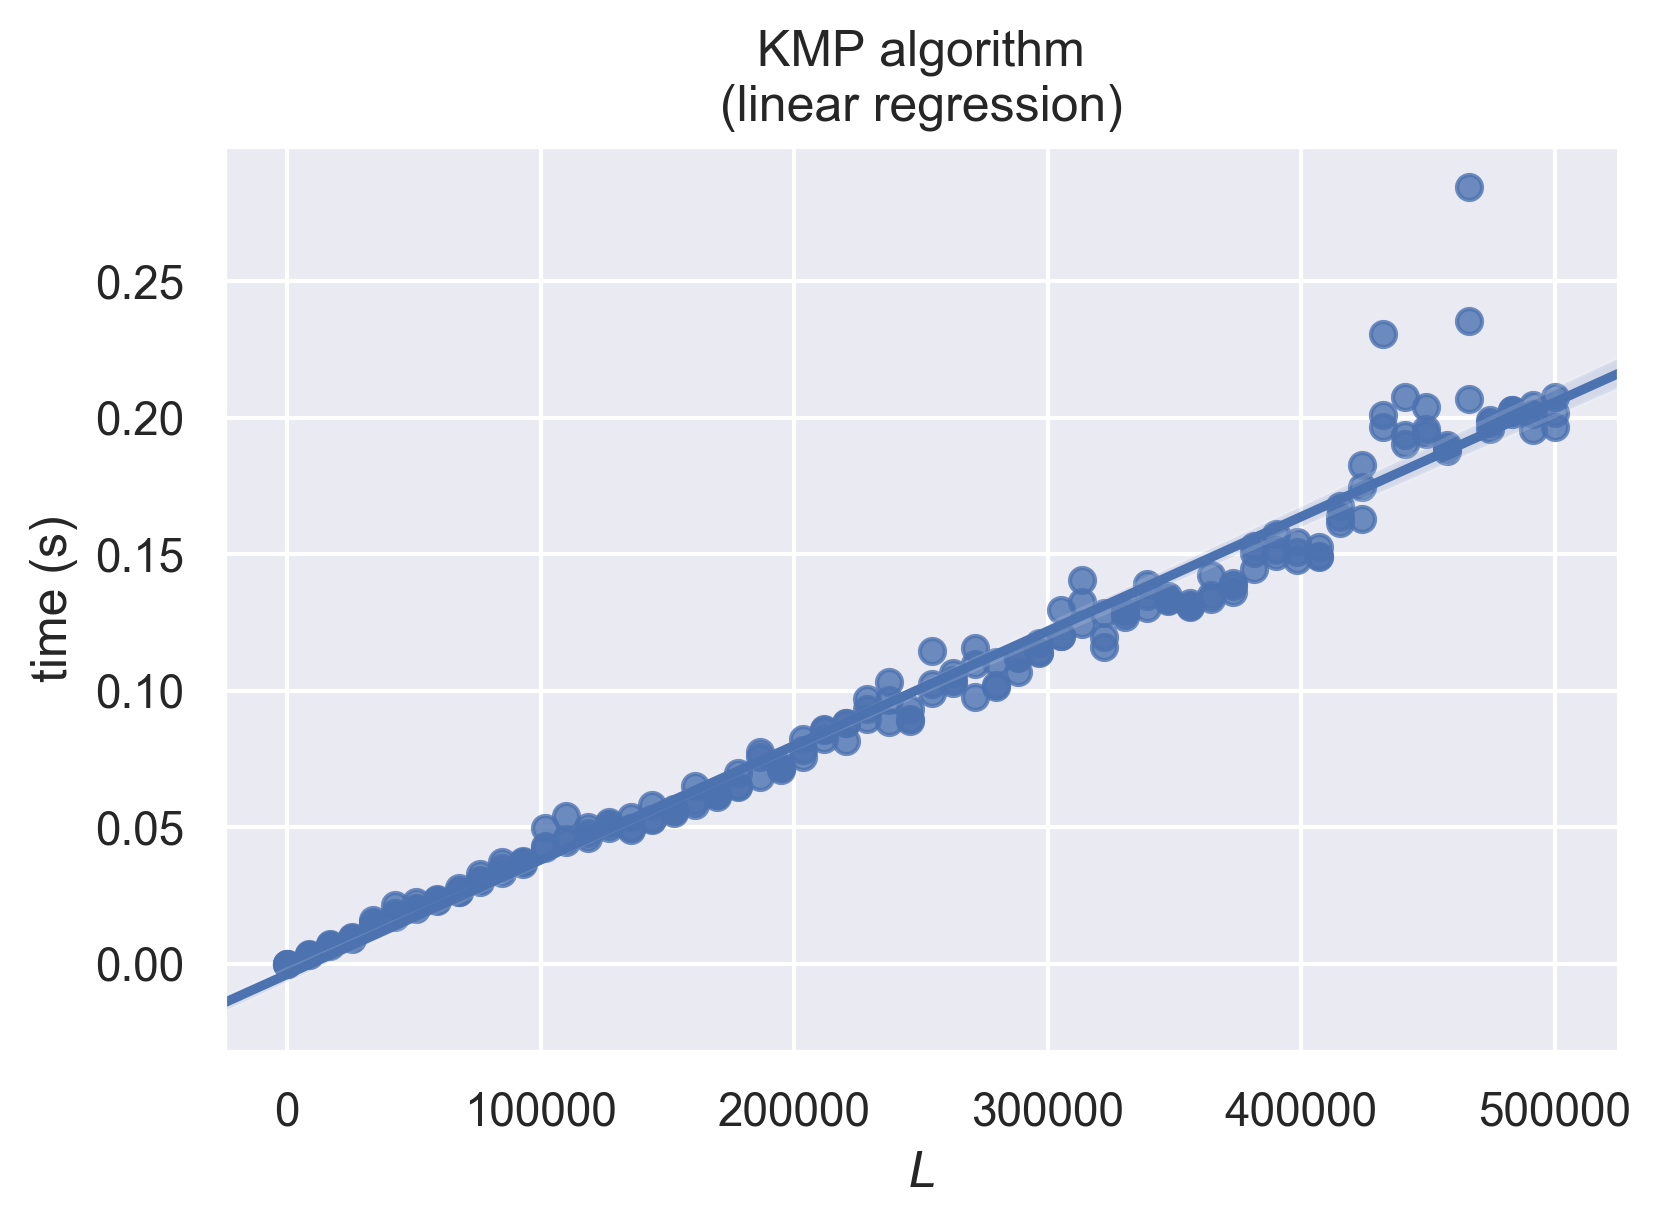

In [13]:
fig, ax = plt.subplots(subplot_kw={"xlabel": "$L$", "ylabel": "time (s)", "title": "KMP algorithm\n(linear regression)"}, dpi=300)
sns.regplot(*benchmarks["KMP"], ax=ax);